In [239]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [240]:
# importing dataset
def loadDataset():
    trainDataset = h5py.File("../../Data/NeuralNetworkDeepLearning/Week2/train_catvnoncat.h5", "r")
    trainDatasetX = np.array(trainDataset["train_set_x"][:])
    trainDatasetY = np.array(trainDataset["train_set_y"][:])
    
    testDataset = h5py.File("../../Data/NeuralNetworkDeepLearning/Week2/test_catvnoncat.h5")
    testDatasetX = np.array(testDataset["test_set_x"][:])
    testDatasetY = np.array(testDataset["test_set_y"][:])

    classes = np.array(trainDataset["list_classes"][:])

    trainDatasetY = trainDatasetY.reshape((1, trainDatasetY.shape[0]))
    testDatasetY = testDatasetY.reshape((1, testDatasetY.shape[0]))
    return trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes

trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes = loadDataset()
print(trainDatasetX.shape, trainDatasetY.shape)

(209, 64, 64, 3) (1, 209)


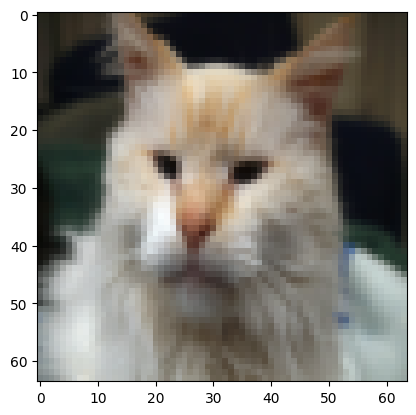

In [241]:
index = 27
plt.imshow(trainDatasetX[index])
plt.show()

In [242]:
#getting parameters
m_train = trainDatasetX.shape[0]
num_px = trainDatasetX.shape[1]
print("Number of training examples: ", m_train)
print("Height of image: ", num_px, "px")
print("Shape of image: ", trainDatasetX[0].shape)
print("Shape of training dataset X: ", trainDatasetX.shape)
print("Shape of training dataset Y: ", trainDatasetY.shape)

Number of training examples:  209
Height of image:  64 px
Shape of image:  (64, 64, 3)
Shape of training dataset X:  (209, 64, 64, 3)
Shape of training dataset Y:  (1, 209)


In [243]:
#reshaping and flattening dataset
XTrainFlatten = trainDatasetX.reshape((trainDatasetX.shape[0], -1)).T
XTestFlatten = testDatasetX.reshape((testDatasetX.shape[0], -1)).T
print("Shape of XFlatten: ", XTrainFlatten.shape)
print("Shape of XTestFlatten: ", XTestFlatten.shape)

Shape of XFlatten:  (12288, 209)
Shape of XTestFlatten:  (12288, 50)


In [244]:
#standardizing the images
XTrainFlatten = XTrainFlatten / 255
XTestFlatten = XTestFlatten / 255

In [245]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [246]:
#initializing parameters
def initializeParameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [247]:
#forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]

    #forward prop
    Z = w.T.dot(X) + b
    A = sigmoid(Z)
    cost = -1/m * np.sum( Y * np.log(A) + (1-Y) * np.log(1-A))

    #backward prop
    dz = A - Y
    db = 1/m * np.sum(dz)
    dw = 1/m * X.dot(dz.T)
    grad = {"dw": dw,
            "db": db}
    
    return grad, cost

In [248]:
#gradient descent 
def gradientDescent(X, Y, numIterations, learningRate, printCost = False):
    nx = X.shape[0]
    m = X.shape[1]
    w, b = initializeParameters(nx)
    costs = []

    for i in range(numIterations):
        grad, cost = propagate(w, b, X, Y)
        costs.append(cost)
        w -= grad["dw"] * learningRate
        b -= grad["db"] * learningRate

        if(printCost and i%100==0):
            print(f"Cost after {i} iterations: {cost}")
    
    params = {"w": w,
              "b": b}
    
    return params, costs

In [249]:
#running gradient descent on our dataset
params, costs = gradientDescent(XTrainFlatten, trainDatasetY, numIterations = 2000, learningRate = 0.005, printCost = True)

Cost after 0 iterations: 0.6931471805599453
Cost after 100 iterations: 0.5845083636993086
Cost after 200 iterations: 0.46694904094655476
Cost after 300 iterations: 0.37600686694802077
Cost after 400 iterations: 0.3314632893282512
Cost after 500 iterations: 0.30327306747438293
Cost after 600 iterations: 0.27987958658260487
Cost after 700 iterations: 0.2600421369258757
Cost after 800 iterations: 0.2429406846779662
Cost after 900 iterations: 0.22800422256726066
Cost after 1000 iterations: 0.2148195137844964
Cost after 1100 iterations: 0.20307819060644985
Cost after 1200 iterations: 0.19254427716706862
Cost after 1300 iterations: 0.18303333796883503
Cost after 1400 iterations: 0.17439859438448874
Cost after 1500 iterations: 0.16652139705400335
Cost after 1600 iterations: 0.15930451829756614
Cost after 1700 iterations: 0.15266732471296507
Cost after 1800 iterations: 0.1465422350398234
Cost after 1900 iterations: 0.14087207570310156


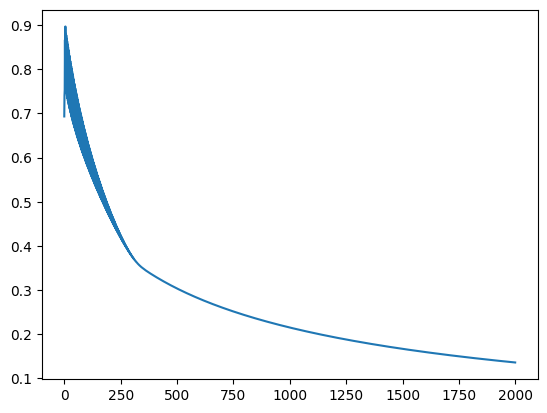

In [250]:
#plotting costs
plt.plot(costs)
plt.show()

In [251]:
#predictions
def predict(params, X, Y):
    w = params["w"]
    b = params["b"]
    Z = w.T.dot(X) + b
    A = sigmoid(Z)
    Y_Prediction = (A > 0.5) * 1.0
    return Y_Prediction

#checking accuracy
trainPrediction = predict(params, XTrainFlatten, trainDatasetY)
testPrediction = predict(params, XTestFlatten, testDatasetY)
print(f"train accuracy: {100-np.mean(np.abs(trainPrediction-trainDatasetY))*100}")
print(f"test accuracy: {100-np.mean(np.abs(testPrediction-testDatasetY))*100}")

train accuracy: 99.04306220095694
test accuracy: 70.0
